IBA IT INDUSTRY READINESS BOOTCAMP PROGRAM at *FAST University*


---


Faisal Ali

Program  : Data Science With Python

Class Room Task | Stock Predictions Financial Time Series

---


> Analyze financial time series data and make accurate predictions using statistical models

  Dataset Link:
>https://classroom.google.com/u/0/c/NjE1NzQxMDc5OTE1

OR

>https://drive.google.com/file/d/1NgM89CYdSQ7N3Mq8tjWLoDm58UZFxknO/view?usp=sharing


Necessary Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from Google Drive
df = pd.read_csv('/content/drive/MyDrive/datasets/FTSE100.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,ftse
0,5/9/2016,6879.422224
1,6/9/2016,6826.046776
2,7/9/2016,6846.579717
3,8/9/2016,6858.701102
4,9/9/2016,6776.945177


Data Preprocessing

In [ ]:
# Convert the 'date' column to datetime format with day-first interpretation
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Set the 'date' column as the index
df.set_index("date", inplace=True)

# Resample data to business days and fill missing values using forward-fill
df = df.asfreq('b').fillna(method='ffill')


Plot PACF

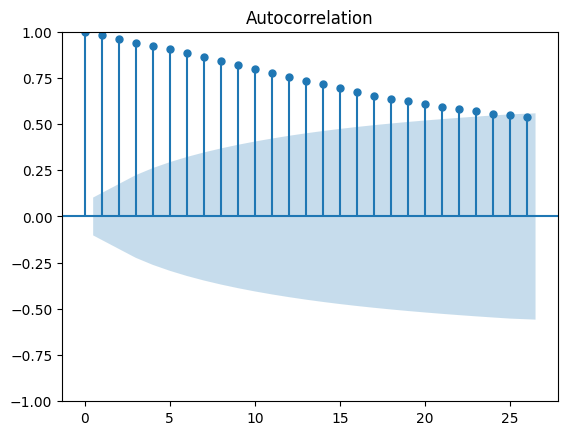

In [ ]:
# Plot autocorrelation function (ACF) to analyze data's seasonality
plot_acf(df)
plt.show()


Plot PACF

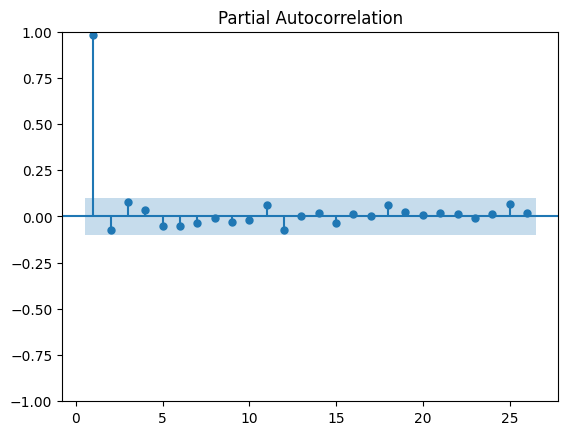

In [ ]:
# Plot partial autocorrelation function (PACF) to analyze data's seasonality
plot_pacf(df, zero=False)
plt.show()


Seasonal Decomposition

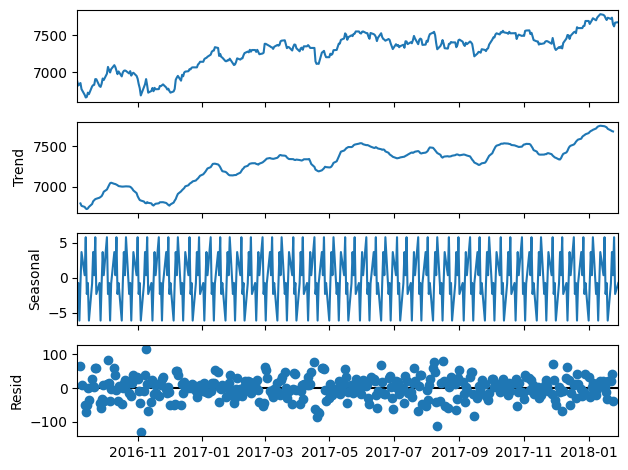

In [ ]:
# Perform seasonal decomposition on the data
series = df
result = seasonal_decompose(series, model='additive', period=7)
result.plot()
plt.show()


Split Data

In [ ]:
# Split data into training and testing sets
size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:size], df.iloc[size:]


ARIMA Model

In [ ]:
# Define and fit an ARIMA model
model = ARIMA(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit()


Make Predictions and Calculate RMSE

In [ ]:
# Make predictions on the test data
predictions = results.predict(start=len(train_data) + 1, end=len(train_data) + len(test_data), dynamic=False)

# Calculate and print Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 118.718


Final Visualization and Evaluation

                   ftse   prediction  difference
date                                            
2017-10-18  7542.866979          NaN         NaN
2017-10-19  7523.038195  7521.026515    2.011680
2017-10-20  7523.225958  7515.331311    7.894647
2017-10-23  7524.452244  7519.711743    4.740501
2017-10-24  7526.543117  7511.422330   15.120787
...                 ...          ...         ...
2018-01-23  7731.827774  7665.826530   66.001244
2018-01-24  7643.428966  7665.012969  -21.584003
2018-01-25  7615.839954  7671.291959  -55.452005
2018-01-26  7665.541292  7666.138117   -0.596825
2018-01-29  7671.533300  7669.639941    1.893359

[74 rows x 3 columns]


<Axes: xlabel='date'>

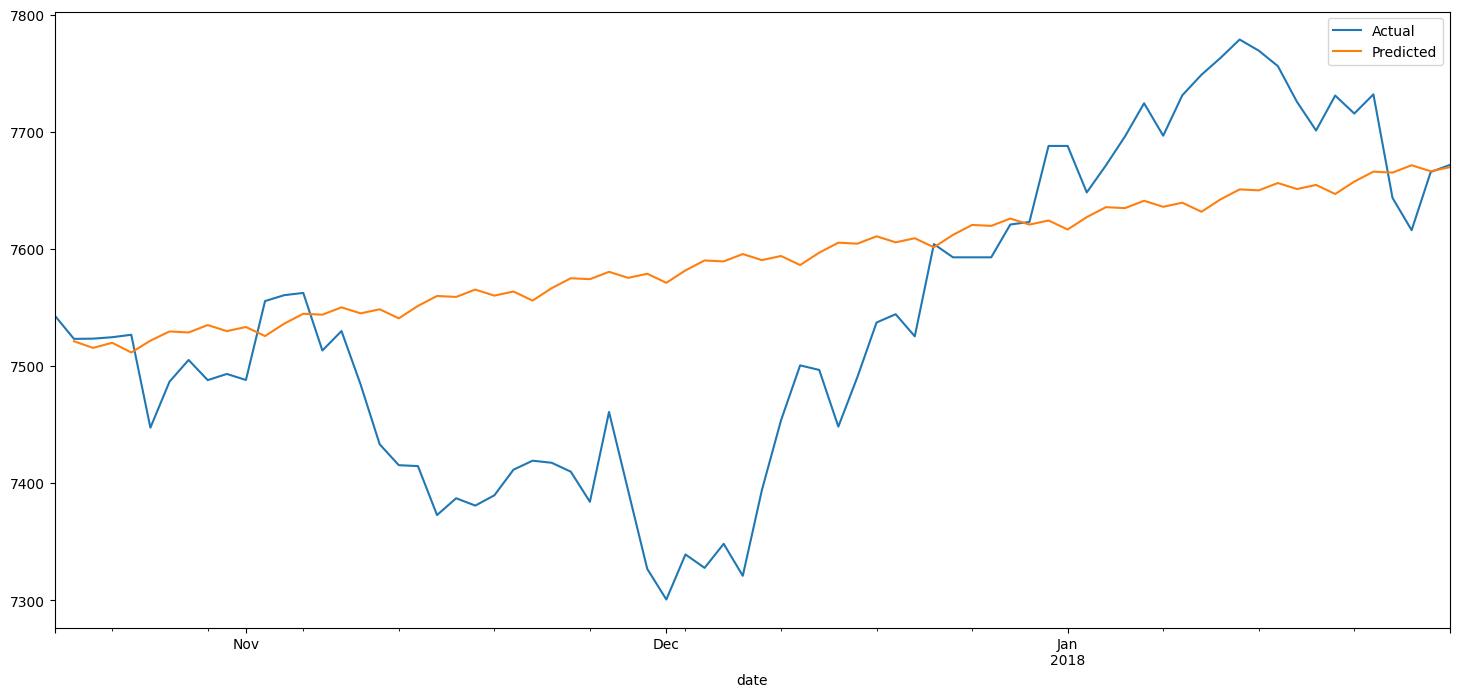

In [ ]:
# Create a DataFrame for the test data
test = test_data.copy()

# Add 'prediction' and 'difference' columns to the test DataFrame
test['prediction'] = predictions
test['difference'] = test["ftse"] - test['prediction']

# Display the test DataFrame
print(test)

# Create a DataFrame for actual and predicted values
df = pd.DataFrame({'Actual': test.ftse, 'Predicted': test.prediction})

# Plot actual vs. predicted values
df.plot(kind='line', figsize=(18, 8))
